# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# !pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key


'c690a7c91713806487e2bda32d7168d5'

## Generate Cities List

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
ok(requests.get(query_url + 'dallasasdf'))

False

In [7]:
def ok(self):
    """Returns True if :attr:`status_code` is less than 400.

    This attribute checks if the status code of the response is between
    400 and 600 to see if there was a client error or a server error. If
    the status code, is between 200 and 400, this will return True. This
    is **not** a check to see if the response code is ``200 OK``.
    """
    try:
        self.raise_for_status()
    except requests.exceptions.RequestException:
        return False
    return True


In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if ok(requests.get(query_url + city)):            
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
    else:
        continue

# Print the city count to confirm sufficient count
len(cities)

554

In [16]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
response = requests.get(query_url + "vanimo").json()
response

{'coord': {'lon': 141.3, 'lat': -2.67},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 80.06,
  'pressure': 1019.18,
  'humidity': 100,
  'temp_min': 80.06,
  'temp_max': 80.06,
  'sea_level': 1019.3,
  'grnd_level': 1019.18},
 'wind': {'speed': 2.26, 'deg': 310.002},
 'rain': {'3h': 0.515},
 'clouds': {'all': 24},
 'dt': 1545703890,
 'sys': {'message': 0.004,
  'country': 'PG',
  'sunrise': 1545683178,
  'sunset': 1545727384},
 'id': 2084442,
 'name': 'Vanimo',
 'cod': 200}

In [17]:
#lets try a better way
df = pd.DataFrame()
columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
for col in columns:
    df[col]=''
error_list = []
for i,city in enumerate(cities):
    response = requests.get(query_url + city).json()
    try:
        df.loc[i,'City'] = city
        df.loc[i, 'Cloudiness'] = response['clouds']['all']
        df.loc[i, 'Country'] = response['sys']['country']
        df.loc[i, 'Date'] = response['dt']
        df.loc[i, 'Humidity'] = response['main']['humidity']
        df.loc[i, 'Lat'] = response['coord']['lat']
        df.loc[i, 'Lng'] = response['coord']['lon']
        df.loc[i, 'Max Temp'] = response['main']['temp_max']
        df.loc[i, 'Wind Speed'] = response['wind']['speed']
    except Exception as e:
        print("[-] Error = "+str(e))
        print(f"something is missing with: {city}")
        
df.head()
print(df.shape)

(554, 9)


In [27]:
num_cols = ['Cloudiness', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
for col in num_cols:
    df[col] = df[col].astype(float)
df.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
df.to_csv("city_weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

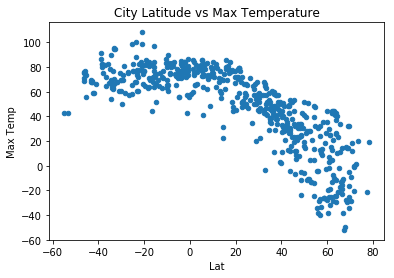

In [30]:
df.plot(kind='scatter', x='Lat', y='Max Temp', title='City Latitude vs Max Temperature')

#### Latitude vs. Humidity Plot

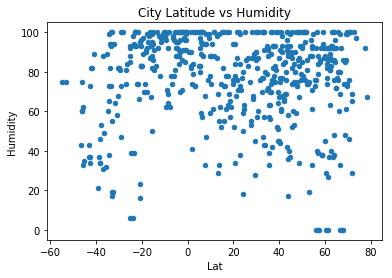

In [32]:
df.plot(kind='scatter', x='Lat', y='Humidity', title='City Latitude vs Humidity')

#### Latitude vs. Cloudiness Plot

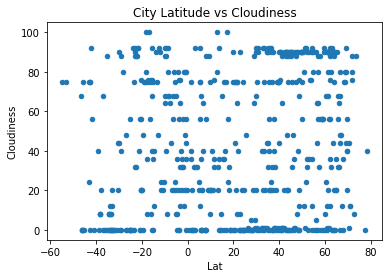

In [33]:
df.plot(kind='scatter', x='Lat', y='Cloudiness', title='City Latitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

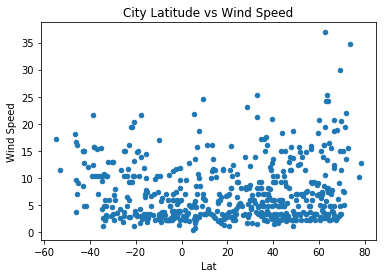

In [34]:
df.plot(kind='scatter', x='Lat', y='Wind Speed', title='City Latitude vs Wind Speed')